In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.shape

(32581, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# Fillimg Null values
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)

In [7]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)

In [8]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
df.duplicated().sum()

165

In [10]:
df.drop_duplicates(inplace=True)

# Univariate

`Univariate Analysis on Categorical features`

In [11]:
def uni_cat(df,column):
    if df[column].dtype in ["O"]:
        print("Feature =",column)
        print()
        print("mode:",df[column].mode())
        print("------------------------------------------------")
        print("Value_counts:\n",df[column].value_counts())
        print(df[column].value_counts().plot(kind = 'bar'),plt.show())

Feature = person_home_ownership

mode: 0    RENT
Name: person_home_ownership, dtype: object
------------------------------------------------
Value_counts:
 RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64


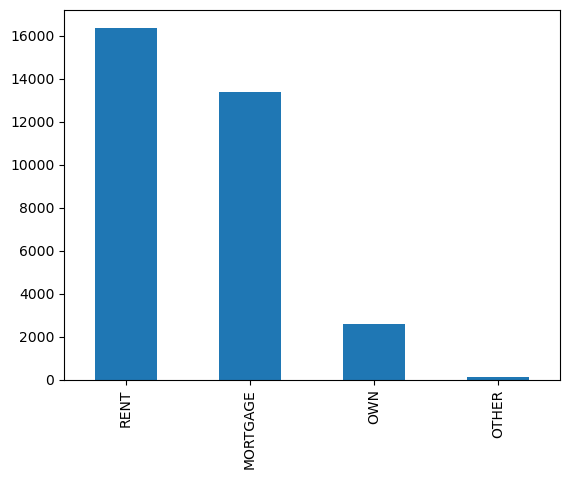

AxesSubplot(0.125,0.11;0.775x0.77) None


In [12]:
uni_cat(df,"person_home_ownership")

Feature = loan_intent

mode: 0    EDUCATION
Name: loan_intent, dtype: object
------------------------------------------------
Value_counts:
 EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64


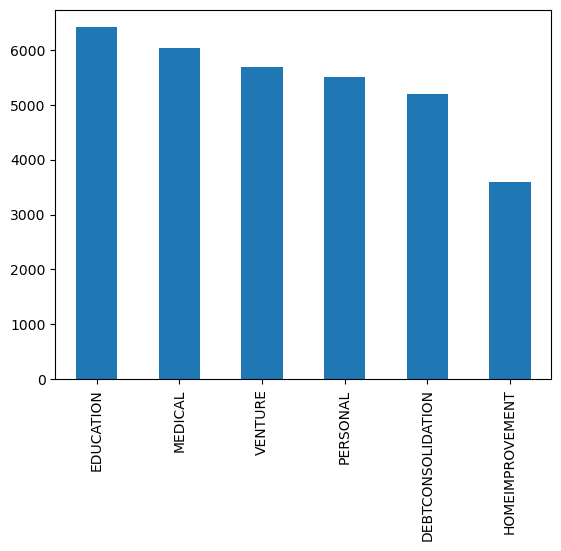

AxesSubplot(0.125,0.11;0.775x0.77) None


In [13]:
uni_cat(df,'loan_intent')

Feature = loan_grade

mode: 0    A
Name: loan_grade, dtype: object
------------------------------------------------
Value_counts:
 A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64


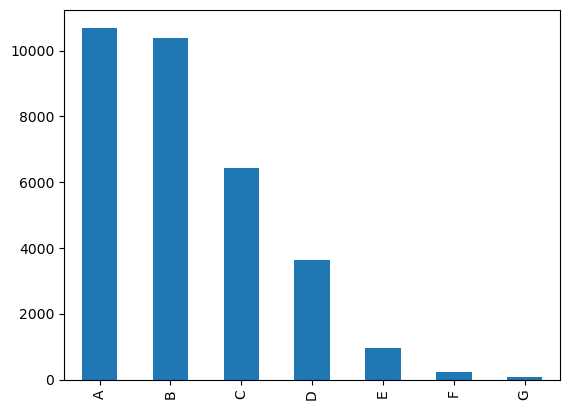

AxesSubplot(0.125,0.11;0.775x0.77) None


In [14]:
uni_cat(df,'loan_grade')

Feature = cb_person_default_on_file

mode: 0    N
Name: cb_person_default_on_file, dtype: object
------------------------------------------------
Value_counts:
 N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64


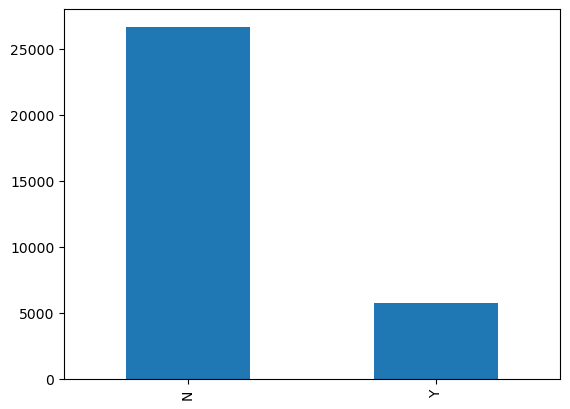

AxesSubplot(0.125,0.11;0.775x0.77) None


In [15]:
uni_cat(df,"cb_person_default_on_file")

`Univariate Analysis on Numerical features`

In [16]:
def uni_num(df,column):
        print("Feature =",column)
        print()
        print("Mix:",df[column].min())
        print("Max:",df[column].max())
        print("Mean:",df[column].mean())
        print("Median:",df[column].median())
        print("Std:",df[column].std())
        print("---------------------------------------------------------")
        df[column].plot(kind = 'box')
        plt.show()
        df[column].plot(kind = 'kde')
        plt.show()
        stats.probplot(df[column],dist='norm',plot=plt)
        plt.show()

Feature = person_age

Mix: 20
Max: 144
Mean: 27.74700765054294
Median: 26.0
Std: 6.354099947312116
---------------------------------------------------------


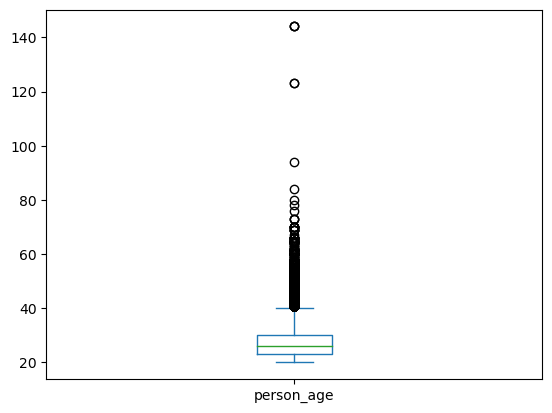

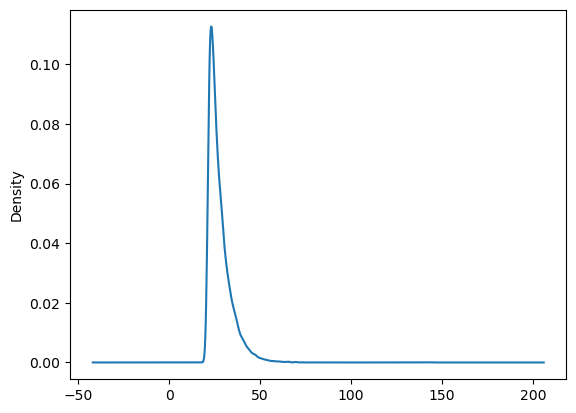

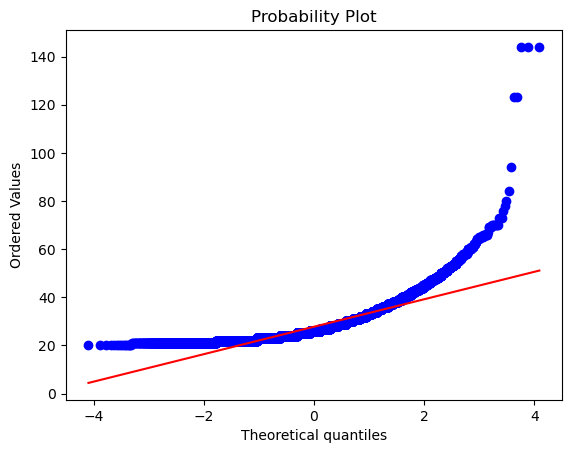

In [17]:
uni_num(df,"person_age")

In [18]:
#Treating Outliers
q1_age=df['person_age'].quantile(0.25)
q3_age=df['person_age'].quantile(0.75)

IQR=q3_age-q1_age

lower_age= q1_age-1.5*IQR
upper_age= q3_age+1.5*IQR

print("Q1 =",q1_age)
print("Q3 =",q3_age)
print("IQR =",IQR)
print("lower =",lower_age)
print("Upper =",upper_age)

Q1 = 23.0
Q3 = 30.0
IQR = 7.0
lower = 12.5
Upper = 40.5


In [19]:
df[(df["person_age"]<lower_age)|(df["person_age"]>upper_age)].shape

(1491, 12)

In [20]:
df["person_age"]=df["person_age"].map(lambda x:lower_age if x<lower_age else upper_age if x>upper_age else x)

In [21]:
df[(df["person_age"]<lower_age)|(df["person_age"]>upper_age)].shape

(0, 12)

Feature = person_age

Mix: 20.0
Max: 40.5
Mean: 27.451921890424483
Median: 26.0
Std: 5.274139307480665
---------------------------------------------------------


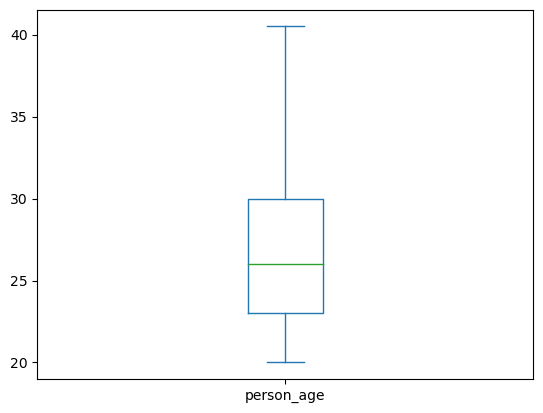

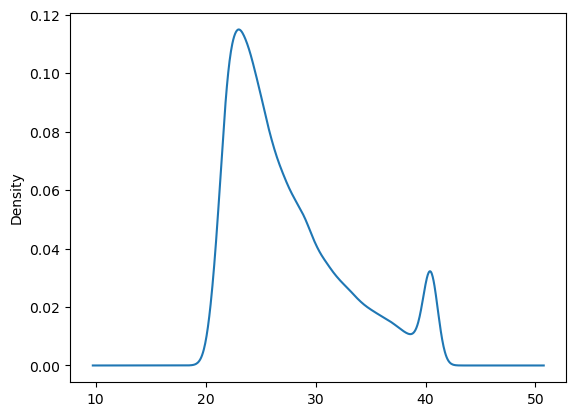

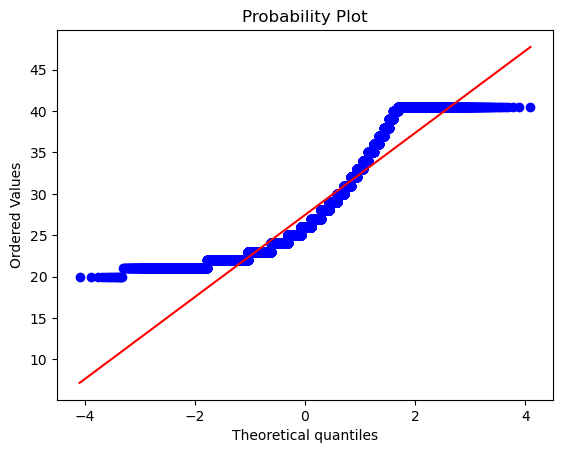

In [22]:
uni_num(df,"person_age")

Feature = person_income

Mix: 4000
Max: 6000000
Mean: 66091.64082551826
Median: 55000.0
Std: 62015.58026889586
---------------------------------------------------------


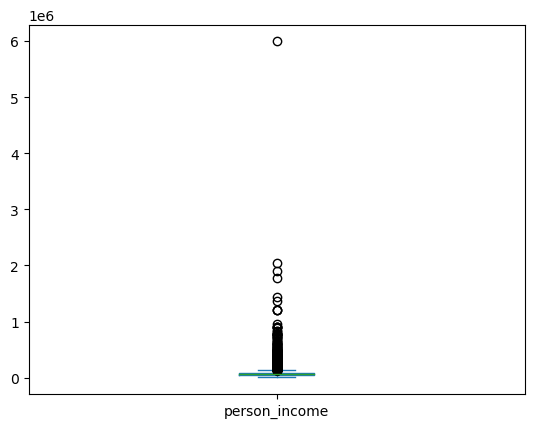

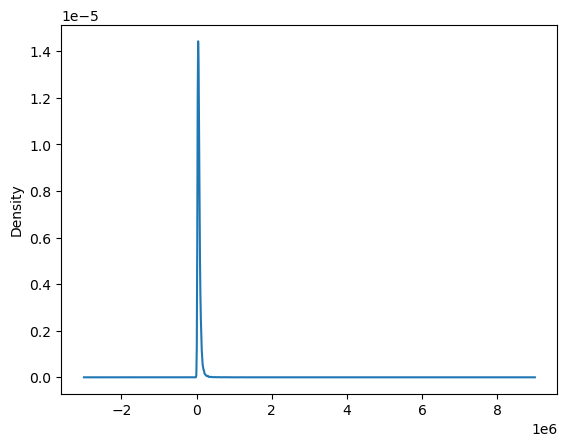

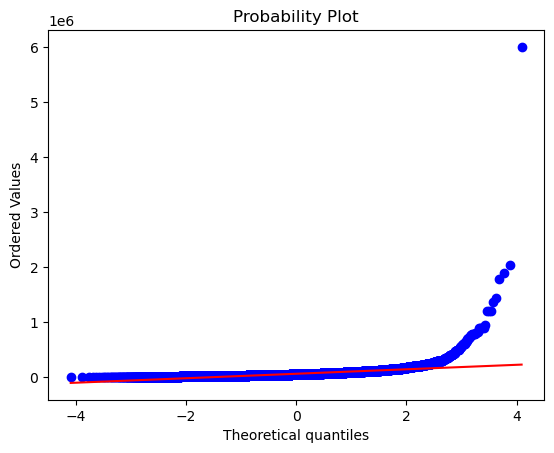

In [23]:
uni_num(df,"person_income")

In [24]:
#Treating Outliers
q1=df['person_income'].quantile(0.25)
q3=df['person_income'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 38542.0
Q3 = 79218.0
IQR = 40676.0
lower = -22472.0
Upper = 140232.0


In [25]:
df["person_income"]=df["person_income"].map(lambda x:lower if x<lower else upper if x>upper else x)

Feature = person_income

Mix: 4000.0
Max: 140232.0
Mean: 62437.02983094768
Median: 55000.0
Std: 31807.39442170959
---------------------------------------------------------


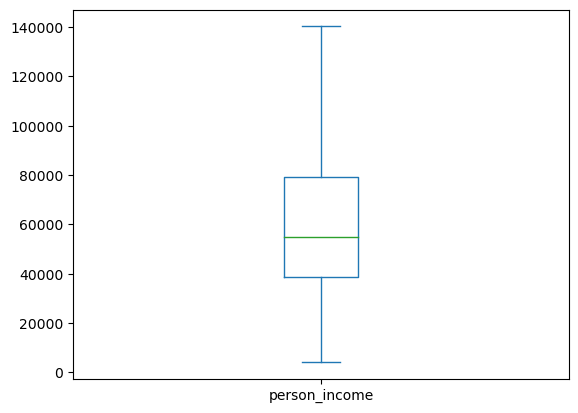

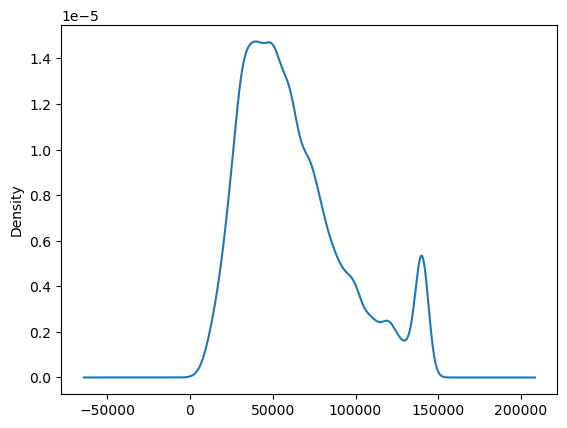

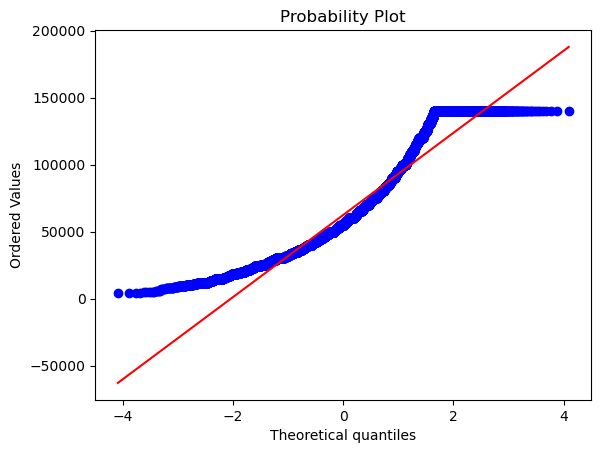

In [26]:
uni_num(df,"person_income")

Feature = person_emp_length

Mix: 0.0
Max: 123.0
Mean: 4.7688795656465945
Median: 4.0
Std: 4.090411377660699
---------------------------------------------------------


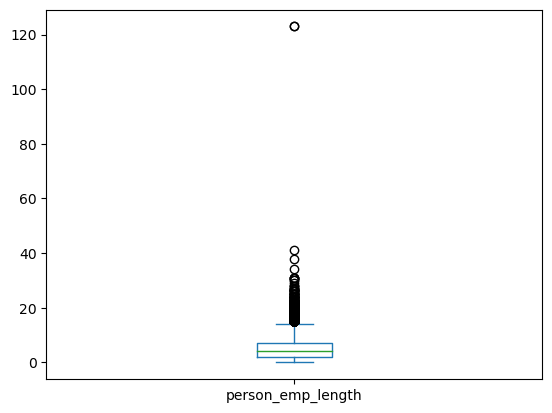

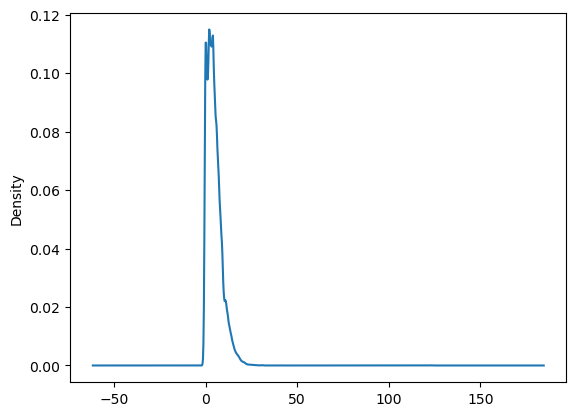

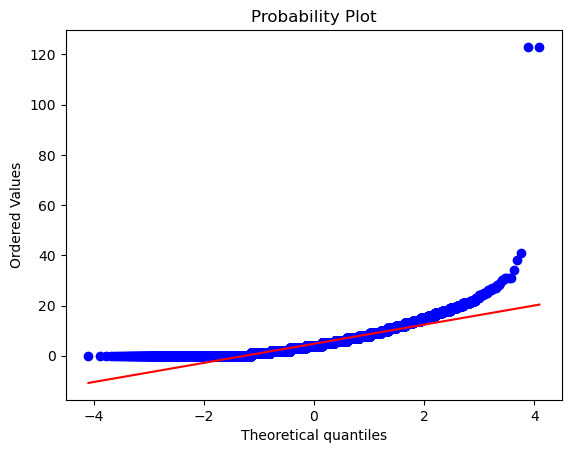

In [27]:
uni_num(df,"person_emp_length")

In [28]:
#Treating Outliers
q1=df['person_emp_length'].quantile(0.25)
q3=df['person_emp_length'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 2.0
Q3 = 7.0
IQR = 5.0
lower = -5.5
Upper = 14.5


In [29]:
df["person_emp_length"]=df["person_emp_length"].map(lambda x:lower if x<lower else upper if x>upper else x)

Feature = person_emp_length

Mix: 0.0
Max: 14.5
Mean: 4.682718410661402
Median: 4.0
Std: 3.7193656270946915
---------------------------------------------------------


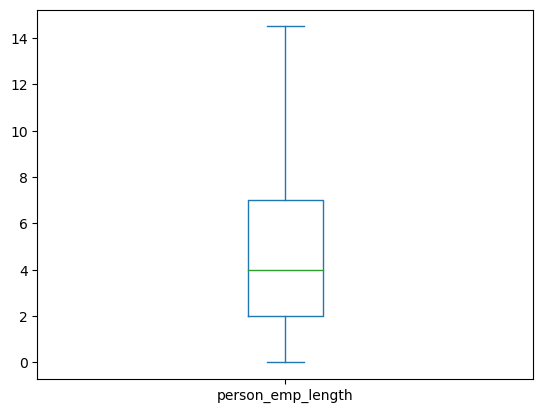

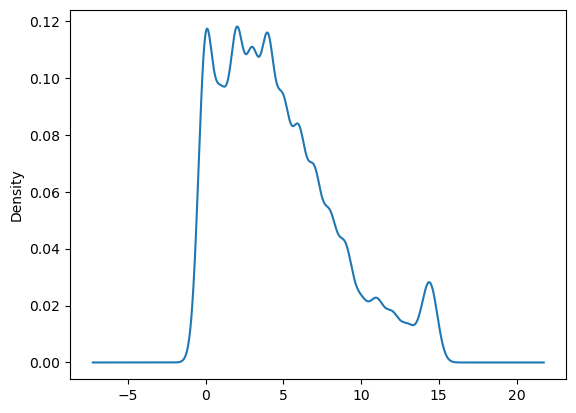

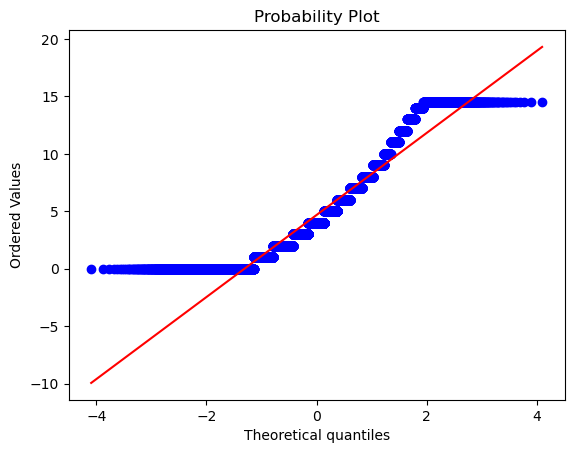

In [30]:
uni_num(df,"person_emp_length")

Feature = loan_amnt

Mix: 500
Max: 35000
Mean: 9593.845631786771
Median: 8000.0
Std: 6322.7302408617625
---------------------------------------------------------


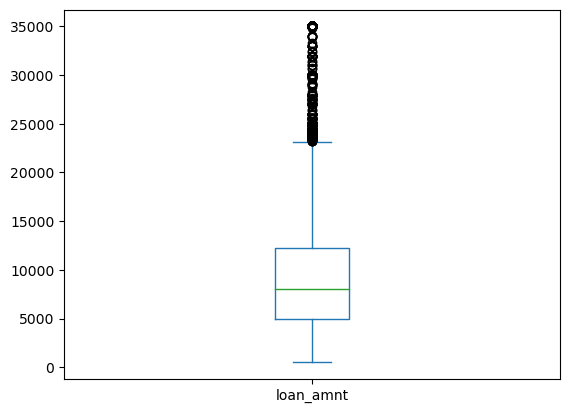

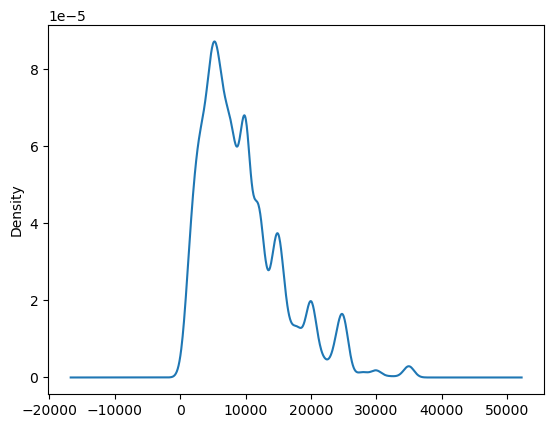

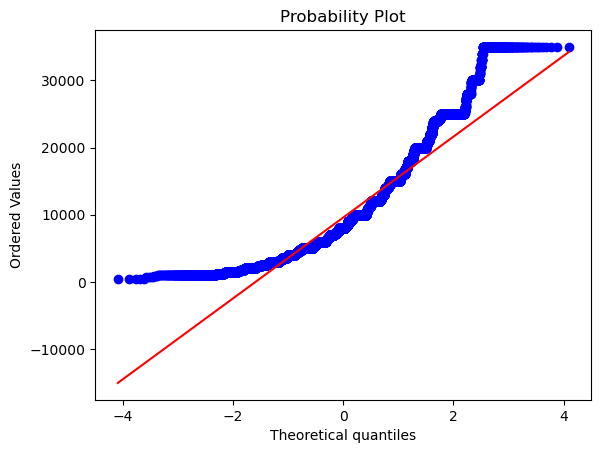

In [31]:
uni_num(df,"loan_amnt")

In [32]:
#Treating Outliers
q1=df['loan_amnt'].quantile(0.25)
q3=df['loan_amnt'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 5000.0
Q3 = 12250.0
IQR = 7250.0
lower = -5875.0
Upper = 23125.0


In [33]:
df["loan_amnt"]=df["loan_amnt"].map(lambda x:lower if x<lower else upper if x>upper else x)

Feature = loan_amnt

Mix: 500.0
Max: 23125.0
Mean: 9418.433026900297
Median: 8000.0
Std: 5828.477669289428
---------------------------------------------------------


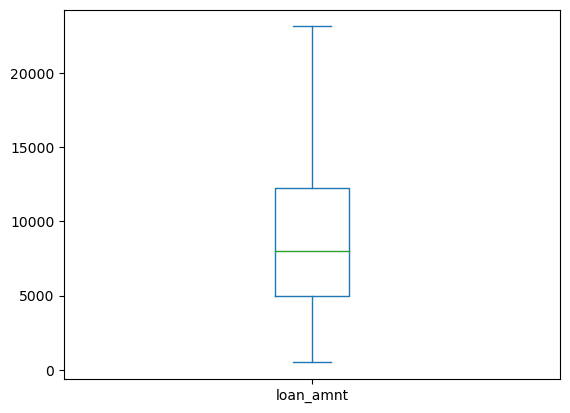

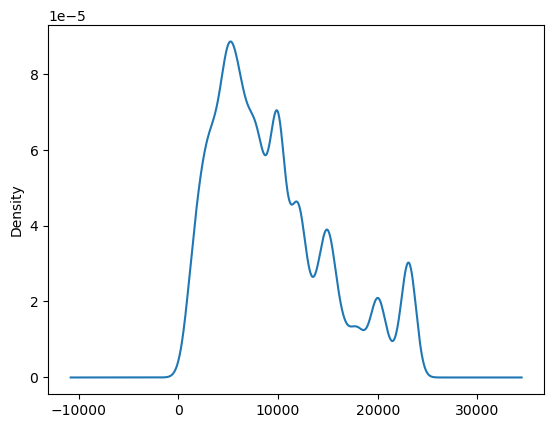

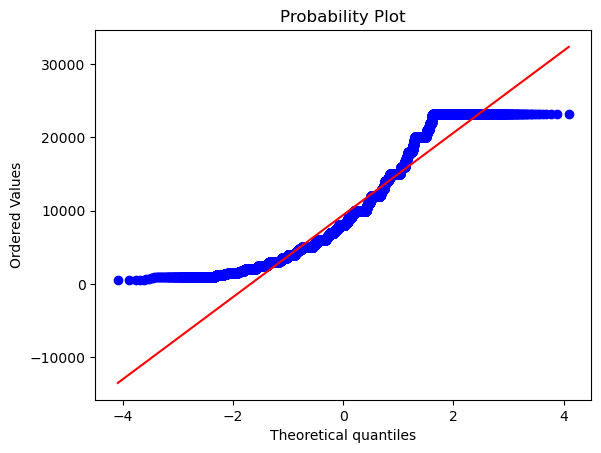

In [34]:
uni_num(df,"loan_amnt")

Feature = loan_int_rate

Mix: 5.42
Max: 23.22
Mean: 11.014661895359158
Median: 10.99
Std: 3.0830504659623212
---------------------------------------------------------


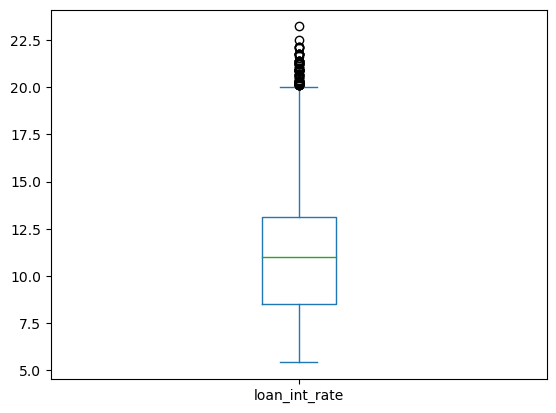

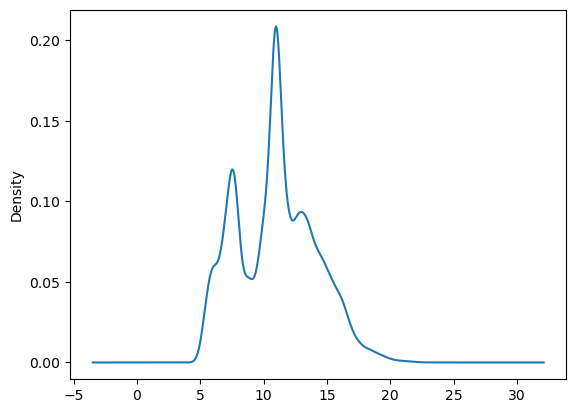

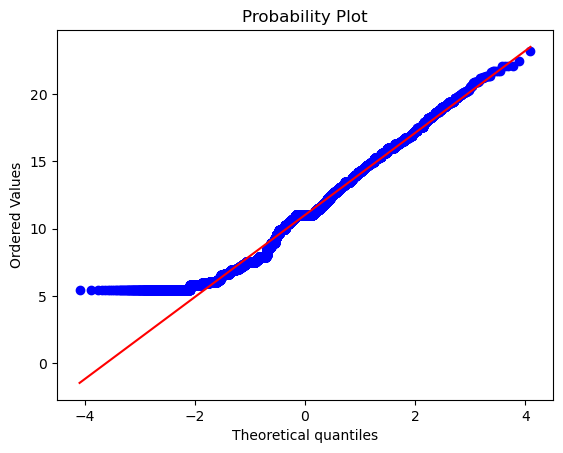

In [35]:
uni_num(df,"loan_int_rate")

In [36]:
#Treating Outliers
q1=df['loan_int_rate'].quantile(0.25)
q3=df['loan_int_rate'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 8.49
Q3 = 13.11
IQR = 4.619999999999999
lower = 1.5600000000000014
Upper = 20.04


In [37]:
median_rate=df["loan_int_rate"].median()
median_rate

10.99

In [38]:
df["loan_int_rate"]=df["loan_int_rate"].map(lambda x:median_rate if x<lower else median_rate if x>upper else x)

Feature = loan_int_rate

Mix: 5.42
Max: 20.03
Mean: 10.993287265546712
Median: 10.99
Std: 3.048478292781134
---------------------------------------------------------


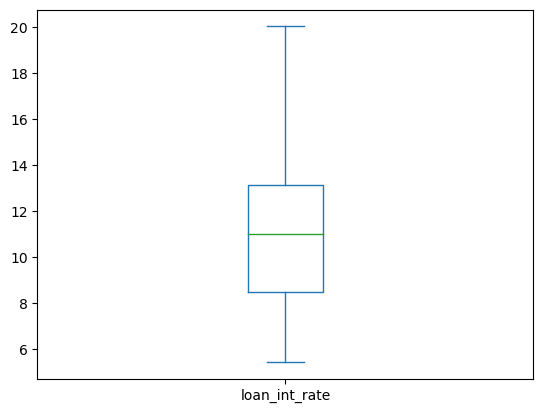

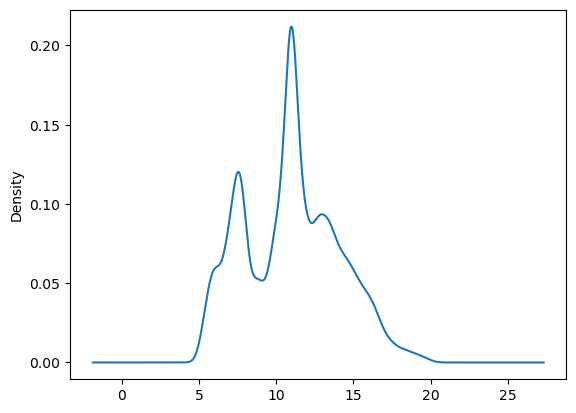

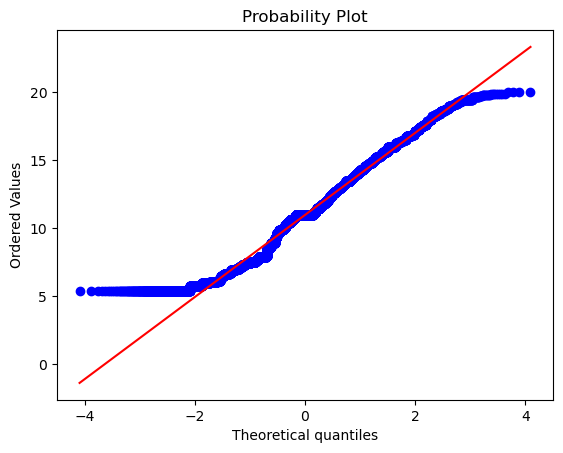

In [39]:
uni_num(df,"loan_int_rate")

Feature = loan_percent_income

Mix: 0.0
Max: 0.83
Mean: 0.17024987660415125
Median: 0.15
Std: 0.10681197337092144
---------------------------------------------------------


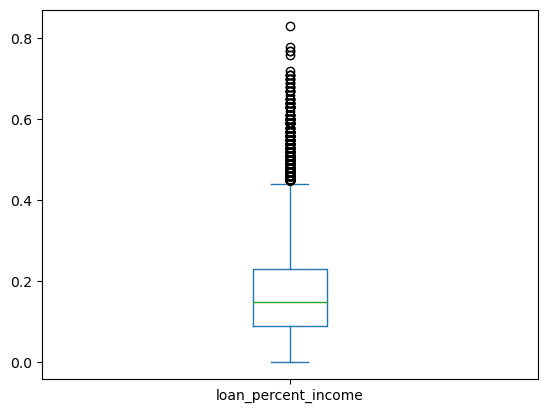

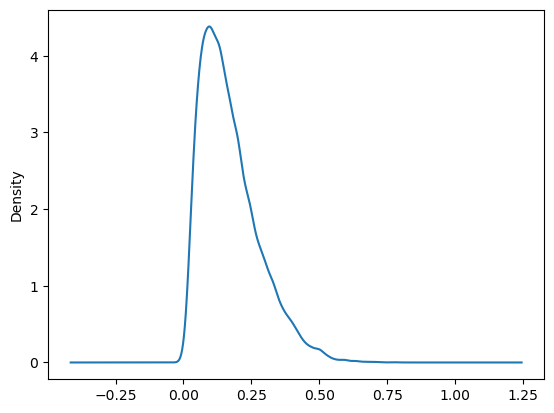

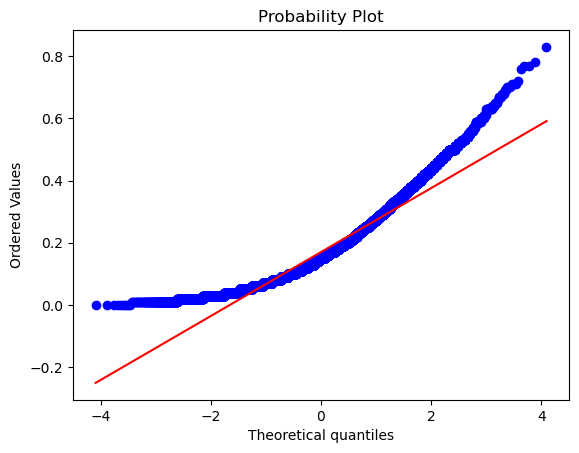

In [40]:
uni_num(df,"loan_percent_income")

In [41]:
#Treating Outliers
q1=df['loan_percent_income'].quantile(0.25)
q3=df['loan_percent_income'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 0.09
Q3 = 0.23
IQR = 0.14
lower = -0.12000000000000002
Upper = 0.44000000000000006


In [42]:
df["loan_percent_income"]=df["loan_percent_income"].map(lambda x:lower if x<lower else upper if x>upper else x)

Feature = loan_percent_income

Mix: 0.0
Max: 0.44000000000000006
Mean: 0.16885426949654936
Median: 0.15
Std: 0.10239535089194919
---------------------------------------------------------


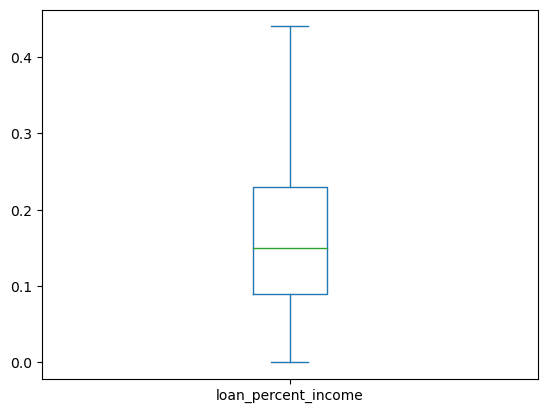

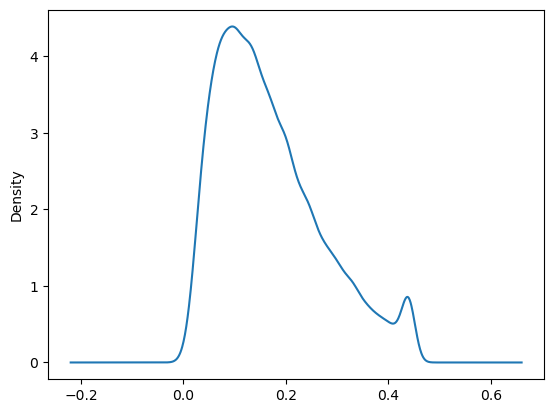

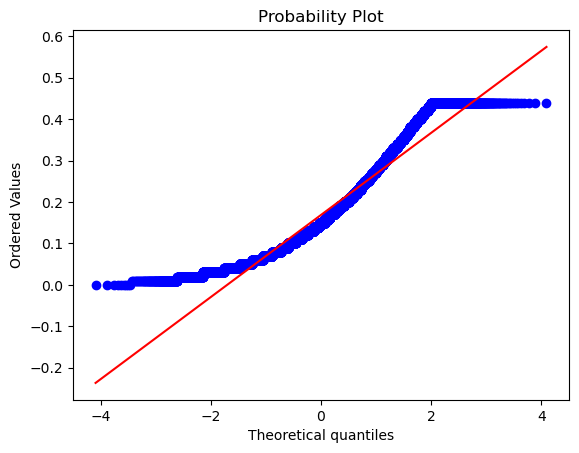

In [43]:
uni_num(df,"loan_percent_income")

Feature = cb_person_cred_hist_length

Mix: 2
Max: 30
Mean: 5.811296890424482
Median: 4.0
Std: 4.059030349939405
---------------------------------------------------------


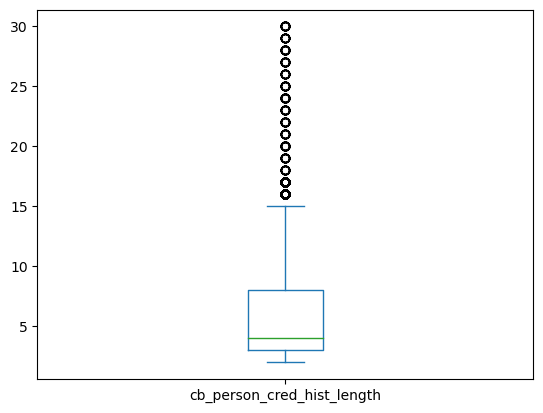

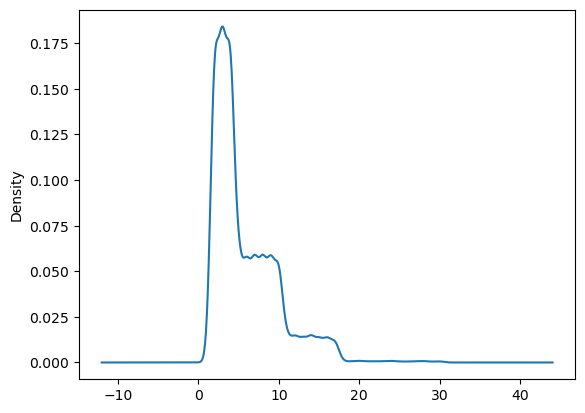

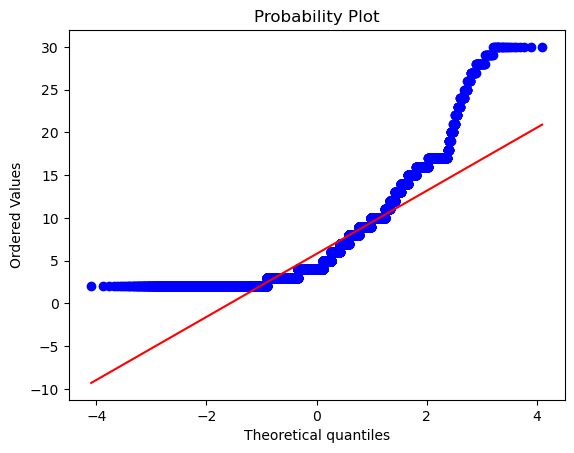

In [44]:
uni_num(df,"cb_person_cred_hist_length")

In [45]:
#Treating Outliers
q1=df['cb_person_cred_hist_length'].quantile(0.25)
q3=df['cb_person_cred_hist_length'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 3.0
Q3 = 8.0
IQR = 5.0
lower = -4.5
Upper = 15.5


In [46]:
df["cb_person_cred_hist_length"]=df["cb_person_cred_hist_length"].map(lambda x:lower if x<lower else upper if x>upper else x)

Feature = cb_person_cred_hist_length

Mix: 2.0
Max: 15.5
Mean: 5.712441386969398
Median: 4.0
Std: 3.7134200653974303
---------------------------------------------------------


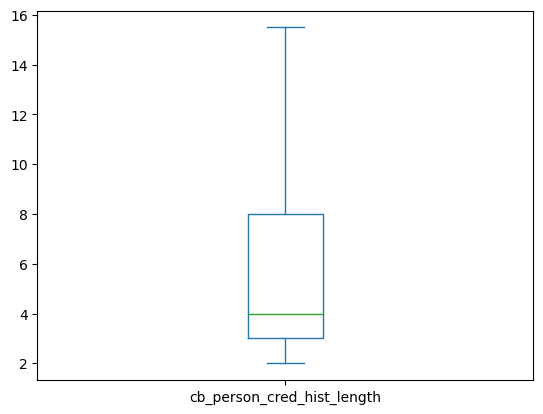

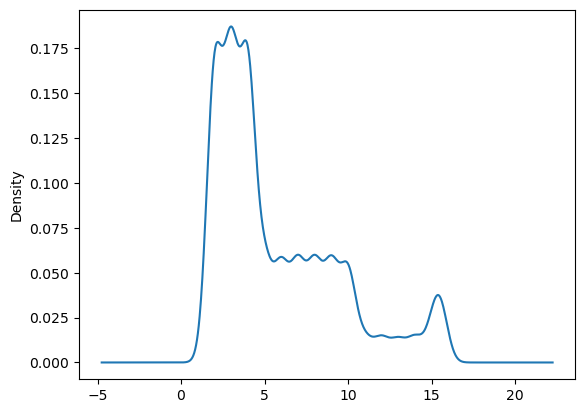

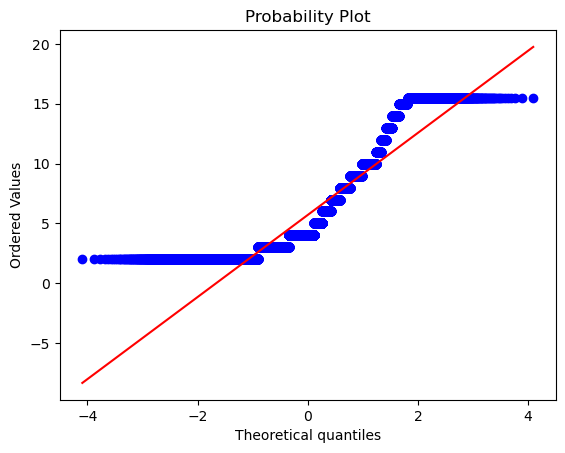

In [47]:
uni_num(df,"cb_person_cred_hist_length")

Feature = loan_status

Mix: 0
Max: 1
Mean: 0.21868830207305034
Median: 0.0
Std: 0.4133630362539111
---------------------------------------------------------


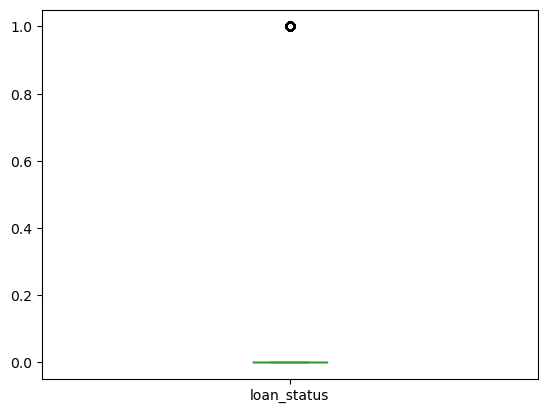

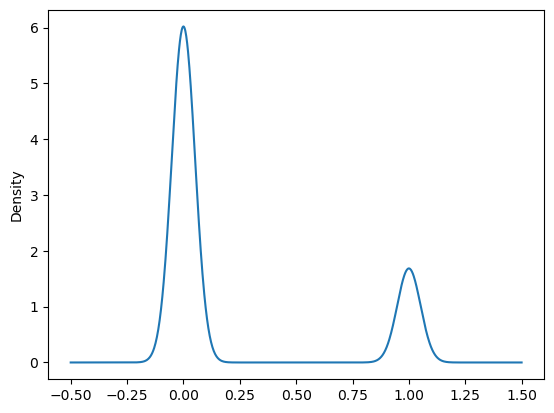

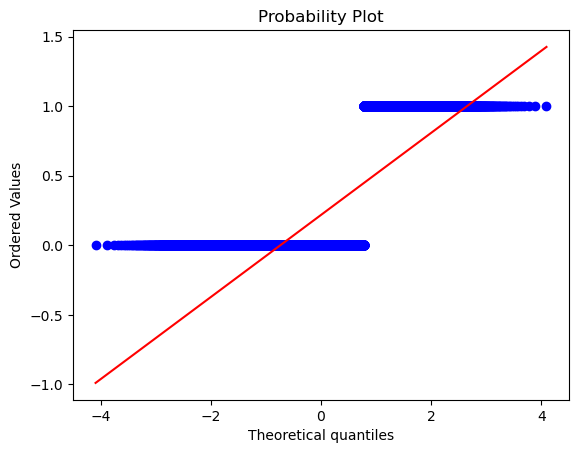

In [48]:
uni_num(df,"loan_status")

# Bivariate analysis

`(Loan intent) Vs (Loan status)`

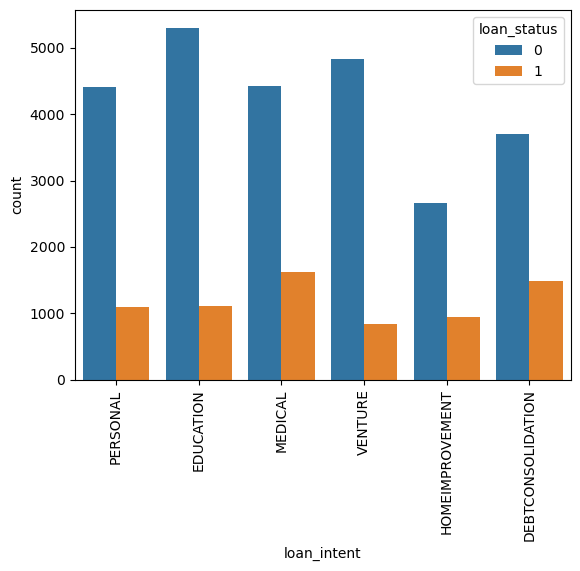

In [56]:
sns.countplot(x="loan_intent",hue='loan_status',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#as per the above relationship we can observe that Majority of them are going for education, venture, personal,medical loans 
#respectively and loan is non defaulted by them as compared to defaulters.

`(Credit_hist_len) Vs (Loan_status)`

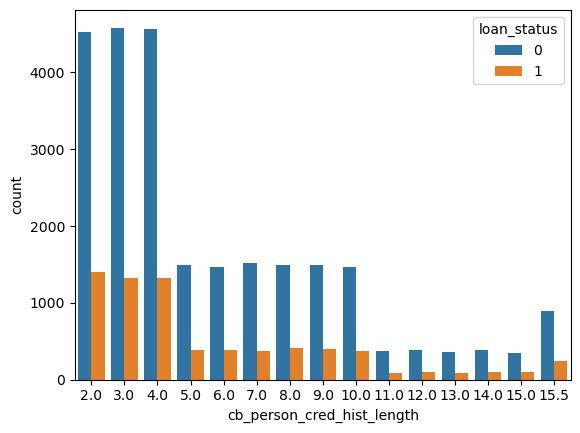

In [59]:
sns.countplot(x="cb_person_cred_hist_length",hue='loan_status',data=df)
plt.show()

`(cb_person_default_on_file) Vs (loan_status)`

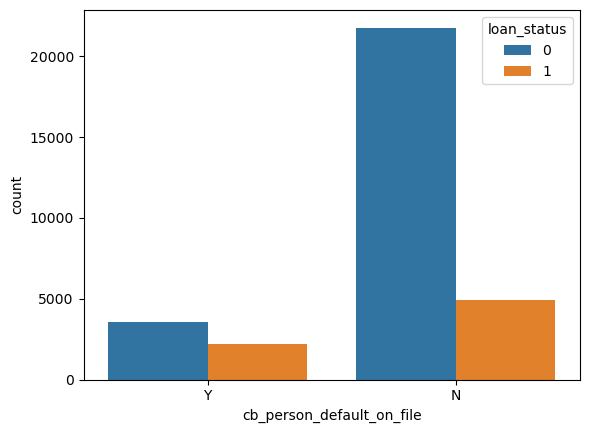

In [61]:
sns.countplot(x="cb_person_default_on_file",hue='loan_status',data=df)
plt.show()

In [62]:
#As per the above countplot we can conclude that the one who has not defaulted the loans are more as compared to defaulters

`(Person_home_ownership)   Vs   (Loan_status)`

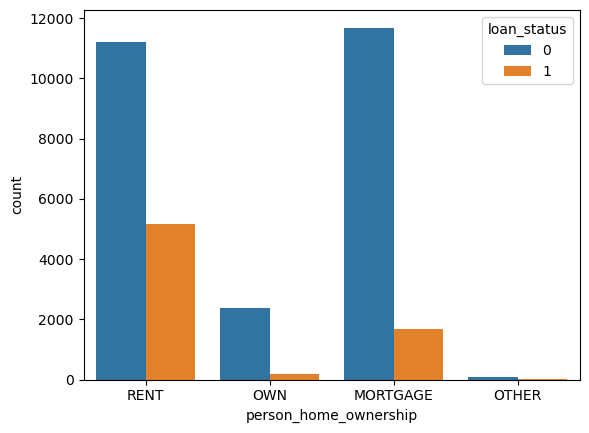

In [63]:
sns.countplot(x="person_home_ownership",hue='loan_status',data=df)
plt.show()

In [64]:
#The one who owns Rented Mortgage, and own houses are more likely to pay back the loans respectively

`(Loan_grade)  Vs  (Loan_status)`

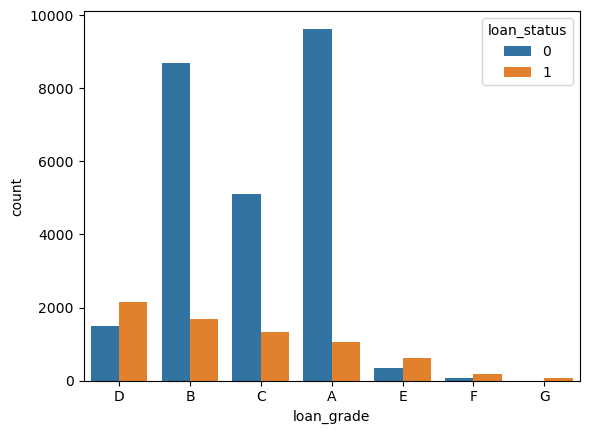

In [65]:
 sns.countplot(x="loan_grade",hue='loan_status',data=df)
plt.show()

In [66]:
#A,B,C,D are the loan grades who defaulted less and more likely to target this kind of loans

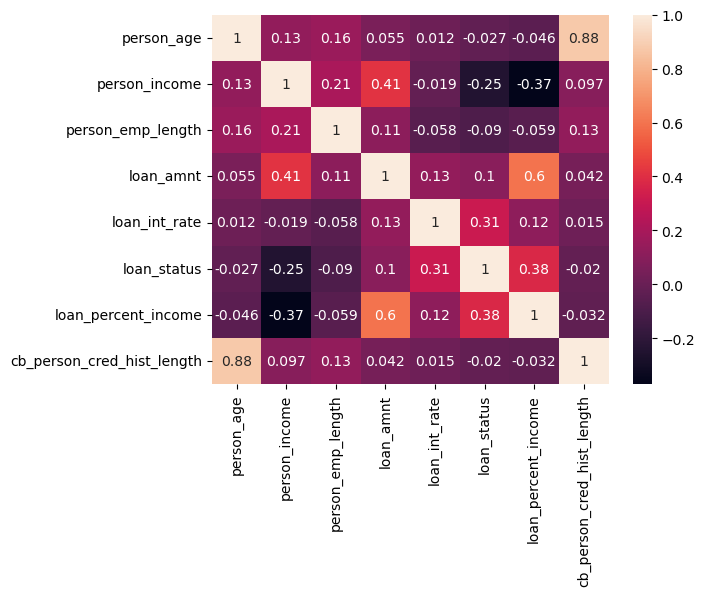

In [68]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
# As per the above Heatmap we can conclude that "credit history len" and "Person" Age are positively highly correlated

Recommendations :-

1. Inorder to capture more business we can capture the customers who are more likely to repay the Loans. And this would reduce the risk factors to the bank regarding the defaulters.
2. We can offer more products to the customer who are already have existing loans with our bank, so that the customer will be less likely to move away from our bank incase he has more stickyness and more relationship with the bank.
3. Provide Better interest rates to the HNI(High Networth individuals) clients so that they would bring more Business in future. And relationship will also increases with the bank.
4. To the existing one Ask them to open the savings accounts to their family members and provide them better services and ask them for references to their friends, this would be an best strategy to capture more business.
5. Inorder to capture the one who default the loans we can also put some special offer to repay their liabilites so that somehow we could recover our money back and there might be any scope for them to take the loans.
6. Target the customers who are in the age group of 25 to 40 years because this is the earning age of any person who are more likely to take any kind of loans and life insurance or health insurance or to start any Business.
7. Based on the eligibility the one who owns rented house ask them to go for home loan to own their dream home.